In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
import re
import scipy as sp
import scipy.stats as stats
from scipy.interpolate import interp1d

import stats13tools.stats13tools as st

%matplotlib inline

In [2]:
colors = {"orange": "#f0ad4e",
          "red": "#d9534f",
          "blue": "#5bc0de",
          "green": "#5cb85c",
          "gray": "#636c72",
          "lightgray": "#d2d2d2"
         }

# One sample mean (t distribution)

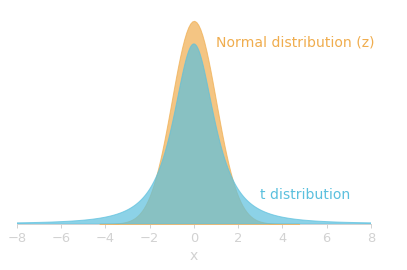

In [3]:
fig = plt.figure(figsize=(6,4))
ax1 = fig.add_axes([0.1, 0.15, 0.82, 0.74])
ax2 = ax1.twinx()


   
#normal distribution
xnorm = np.linspace(stats.norm.ppf(0.00001),
                 stats.norm.ppf(0.999999), 100)
ynorm = stats.norm.pdf(xnorm)

#t distribution
xt = np.linspace(-10, 10, 1000)
yt = stats.t(2, 0).pdf(xt)

ax1.fill_between(xnorm, ynorm, color=colors["orange"], alpha=0.7, zorder=100)
ax2.fill_between(xt, yt, color=colors["blue"], alpha=0.7, zorder=100)
#ax2.plot(xt, stats.t(1E10, 0).pdf(xt))


for spine in ["bottom"]:
    ax1.spines[spine].set_linewidth(1)
    ax1.spines[spine].set_color(colors["lightgray"])
for spine in ["top", "right", "left"]:
    ax1.spines[spine].set_visible(False)

for ax in [ax1]:
    ax.set_yticks([])
    ax.tick_params(axis="both", width=1, size=4, color=colors["lightgray"], labelcolor=colors["lightgray"], 
                   labelsize=13, pad=4)
    ax.set_xlabel("x", size=14, color=colors["lightgray"])
    ax.set_xlim(-8, 8)
    ax.set_ylim(0)
    ax.text(1, 0.35, "Normal distribution (z)", size=14, color=colors["orange"])
    ax.text(3, 0.05, "t distribution", size=14, color=colors["blue"])

for ax in [ax2]:
    ax.set_ylim(ax1.get_ylim())
    ax.axis("off")
    
 

   
plt.savefig("/Users/Gui/Box Sync/_STATS13/_Slides/_stats13-Lectures/assets/img/lec/distribution-t-vs-z.svg", transparent=True)

# UCLA salaries (2014)

## Full population

In [3]:
data_original = pd.read_csv("data-src/salaries-ucla2014.csv")
#data = data_original.loc[(data_original.NAME != "***** , *****") & (data_original.BASE >= 12000), "GROSS"]
data = data_original.loc[(data_original.NAME != "***** , *****") & (data_original.BASE >= 12000)] #in 2014, there was no base salary < 12000

In [4]:
print("Min salary:\n {} => {}".format(data[data.GROSS==data.GROSS.min()].NAME.values[0], data[data.GROSS==data.GROSS.min()].GROSS.values[0]))
print("Max salary:\n {} => {}".format(data[data.GROSS==data.GROSS.max()].NAME.values[0], data[data.GROSS==data.GROSS.max()].GROSS.values[0]))

Min salary:
 DADASHIAN , EMAN L => 2000
Max salary:
 MORA , JAMES LAWRENCE => 3476127


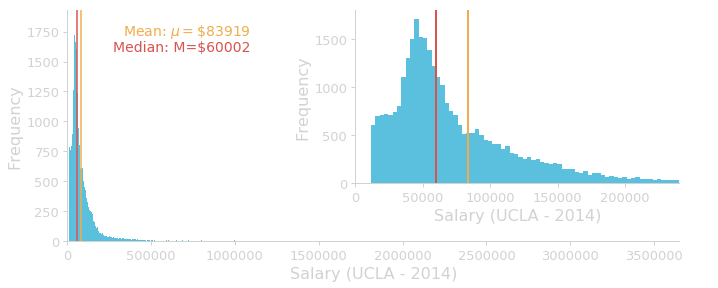

In [258]:
fig = plt.figure(figsize=(10,4))
ax1 = fig.add_axes([0.1, 0.15, 0.85, 0.8])
ax2 = ax1.twinx()
ax3 = fig.add_axes([0.5, 0.35, 0.45, 0.6])


ax1.hist(data.GROSS, bins="auto", color=colors["blue"]);
ax3.hist(data.loc[data.GROSS<240000, "GROSS"], bins="auto", color=colors["blue"]);

for ax in [ax1, ax3]:
    for spine in ["bottom", "left"]:
        ax.spines[spine].set_linewidth(1)
        ax.spines[spine].set_color(colors["lightgray"])
    for spine in ["top", "right"]:
        ax.spines[spine].set_visible(False)

for ax in [ax1, ax3]:
    ax.set_xlim(0)
    ax.set_ylim(0)
    ax.set_xlabel("Salary (UCLA - 2014)", size=16, color=colors["lightgray"])
    ax.tick_params(axis="both", width=1, size=4, color=colors["lightgray"], labelcolor=colors["lightgray"], 
                   labelsize=13, pad=4)
    ax.set_ylabel("Frequency", size=16, color=colors["lightgray"])
    
for ax in [ax2]:
    ax.set_ylim(ax1.get_ylim())
    ax.axis("off")
    ax.axvline(data.GROSS.mean(), color=colors["orange"])
    ax.axvline(data.GROSS.median(), color=colors["red"])
    ax.text(ax.get_xlim()[1]*0.3, ax.get_ylim()[1]*0.95, "Mean: $\mu=\$${:.0f}".format(data.GROSS.mean()), size=14, color=colors["orange"], ha="right", va="top")
    ax.text(ax.get_xlim()[1]*0.3, ax.get_ylim()[1]*0.87, "Median: M=${:.0f}".format(data.GROSS.median()), size=14, color=colors["red"], ha="right", va="top")

for ax in [ax3]:
    ax.set_xlim(0, 240000)
    ax.axvline(data.GROSS.mean(), color=colors["orange"], lw=2)
    ax.axvline(data.GROSS.median(), color=colors["red"], lw=2)
    
plt.savefig("/Users/Gui/Box Sync/_STATS13/_Slides/_stats13-Lectures/assets/img/lec/salaries-ucla2014-all.svg", transparent=True)

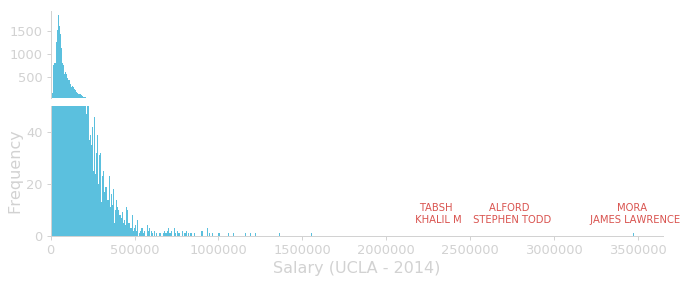

In [8]:
fig = plt.figure(figsize=(10,4))
ax1 = fig.add_axes([0.1, 0.15, 0.85, 0.45])
ax2 = fig.add_axes([0.1, 0.63, 0.85, 0.3])

for ax in [ax1, ax2]:
    ax.hist(data.GROSS, bins="auto", color=colors["blue"]);
    
for spine in ["bottom", "left"]:
    ax1.spines[spine].set_linewidth(1)
    ax1.spines[spine].set_color(colors["lightgray"])
for spine in ["top", "right"]:
    ax1.spines[spine].set_visible(False)

for ax in [ax1]:
    ax.set_xlim(0)
    ax.set_ylim(0, 50)
    ax.set_xlabel("Salary (UCLA - 2014)", size=16, color=colors["lightgray"])
    ax.tick_params(axis="both", width=1, size=4, color=colors["lightgray"], labelcolor=colors["lightgray"], 
                   labelsize=13, pad=4)
    #ax.text(-300000, 50, "Frequency", size=16, color=colors["lightgray"], rotation=90)
    ax.set_ylabel("Frequency", size=16, color=colors["lightgray"])
    for big_salary in data.GROSS.sort_values().values[-3:]:
        ax.text(big_salary, 5, "{}\n{}".format(data[data.GROSS==big_salary].NAME.values[0].split(",")[0], 
                                                 data[data.GROSS==big_salary].NAME.values[0].split(",")[1]),
                size=10, color=colors["red"], ha="center")

for ax in [ax2]:
    ax.set_xlim(0)
    ax.set_xticks([])
    ax.set_ylim(50)
    for spine in ["left"]:
        ax.spines[spine].set_linewidth(1)
        ax.spines[spine].set_color(colors["lightgray"])
    for spine in ["top", "right", "bottom"]:
        ax.spines[spine].set_visible(False)
    ax.tick_params(axis="both", width=1, size=4, color=colors["lightgray"], labelcolor=colors["lightgray"], 
                   labelsize=13, pad=4)

plt.savefig("/Users/Gui/Box Sync/_STATS13/_Slides/_stats13-Lectures/assets/img/lec/salaries-ucla2014-zoom.svg", transparent=True)

## Sample

In [5]:
n_sample = 100
ucla_sample_idx = np.random.choice(data.index.values, replace=False, size=n_sample)

ucla_sample = data.ix[ucla_sample_idx]

In [6]:
#savesample data to csv to be generated as table via d3
pd.DataFrame(np.concatenate([list(ucla_sample.GROSS.values), ["-" for i in range(2)]]).reshape((17,6))).to_csv("/Users/Gui/Box Sync/_STATS13/_Slides/_stats13-Lectures/assets/d3-anim/js-graphs/js-graphs-data-src/salaries-ucla-sample.csv",
                                                              index=False, header=False)

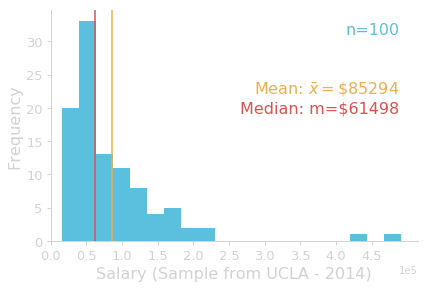

In [7]:
fig = plt.figure(figsize=(6,4))
ax1 = fig.add_axes([0.11, 0.15, 0.85, 0.8])
ax2 = ax1.twinx()

ax1.hist(ucla_sample.GROSS, bins="auto", color=colors["blue"]);
    
for spine in ["bottom", "left"]:
    ax1.spines[spine].set_linewidth(1)
    ax1.spines[spine].set_color(colors["lightgray"])
for spine in ["top", "right"]:
    ax1.spines[spine].set_visible(False)

for ax in [ax1]:
    ax.set_xlim(0)
    ax.set_ylim(0)
    ax.set_xticks(np.arange(0, ucla_sample.GROSS.max()+1, 50000))
    ax.set_xlabel("Salary (Sample from UCLA - 2014)", size=16, color=colors["lightgray"])
    ax.tick_params(axis="both", width=1, size=4, color=colors["lightgray"], labelcolor=colors["lightgray"], 
                   labelsize=13, pad=4)
    ax.ticklabel_format(style='sci', axis='x', scilimits=(0,5))
    ax.set_ylabel("Frequency", size=16, color=colors["lightgray"])
    ax.text(ax.get_xlim()[1]*0.95, ax.get_ylim()[1]*0.95, "n={:.0f}".format(len(ucla_sample)), size=16, color=colors["blue"], ha="right", va="top")
    
for ax in [ax2]:
    ax.set_ylim(ax1.get_ylim())
    ax.axis("off")
    ax.axvline(ucla_sample.GROSS.mean(), color=colors["orange"])
    ax.axvline(ucla_sample.GROSS.median(), color=colors["red"])
    ax.text(ax.get_xlim()[1]*0.95, ax.get_ylim()[1]*0.7, r"Mean: $\bar{{x}}=$\${:.0f}".format(ucla_sample.GROSS.mean()), size=16, color=colors["orange"], ha="right", va="top")
    ax.text(ax.get_xlim()[1]*0.95, ax.get_ylim()[1]*0.61, "Median: m=${:.0f}".format(ucla_sample.GROSS.median()), size=16, color=colors["red"], ha="right", va="top")


plt.savefig("/Users/Gui/Box Sync/_STATS13/_Slides/_stats13-Lectures/assets/img/lec/salaries-ucla2014-sample.svg", transparent=True)

### National US data (2014)

https://www.census.gov/data/tables/time-series/demo/income-poverty/cps-pinc/pinc-01.2014.html

In [8]:
census2014 = {"mean": 62931,
              "median": 46480}

### bootstrap ci

In [9]:
n_simul = 10000
res_ucla_mean = np.zeros(n_simul)
res_ucla_median = np.zeros(n_simul)

for i in range(n_simul):
    res_ucla_mean[i]=np.random.choice(ucla_sample.GROSS.values, size=len(ucla_sample)).mean()
    res_ucla_median[i]=np.median(np.random.choice(ucla_sample.GROSS.values, size=len(ucla_sample)))

ucla_mean_ci = [np.percentile(res_ucla_mean, 2.5), np.percentile(res_ucla_mean, 97.5)]
ucla_median_ci = [np.percentile(res_ucla_median, 2.5), np.percentile(res_ucla_median, 97.5)]

In [10]:
print("Mean 95% ci: [{:.2f}, {:.2f}]".format(ucla_mean_ci[0], ucla_mean_ci[1]))
print("Median 95% ci: [{:.2f}, {:.2f}]".format(ucla_median_ci[0], ucla_median_ci[1]))

Mean 95% ci: [72336.85, 100054.73]
Median 95% ci: [56346.50, 75914.50]


### t statistic


In [75]:
ucla_sample.GROSS.std()

71939.99320902277

In [11]:
ucla_sample_se = ucla_sample.GROSS.std()/np.sqrt(len(ucla_sample))
t_ucla = (ucla_sample.GROSS.mean()-census2014["mean"])/ucla_sample_se
t_ucla

3.1085727149047346

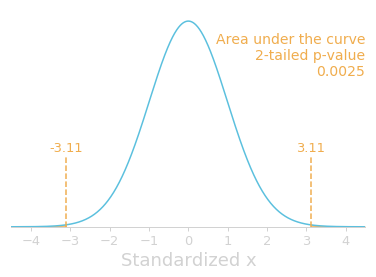

In [98]:
#t distribution
tdist_ucla = stats.t(df=len(ucla_sample)-1, loc=0, scale=1)
xt0_ucla = np.linspace(-4.5, 4.5, 1000)
yt0_ucla = tdist_ucla.pdf(xt0_ucla)


fig = plt.figure(figsize=(6,4))
ax1 = fig.add_axes([0.1, 0.15, 0.82, 0.75])
   
for ax in [ax1]:
    ax.plot(xt0_ucla, yt0_ucla, color=colors["blue"], lw=1.5)
    ax.fill_between(xt0_ucla[xt0_ucla<-t_ucla], yt0_ucla[xt0_ucla<-t_ucla],
                       color=colors["orange"], alpha=0.7)
    ax.fill_between(xt0_ucla[xt0_ucla>t_ucla], yt0_ucla[xt0_ucla>t_ucla],
                        color=colors["orange"], alpha=0.7) 
    ax.axvline(t_ucla, ymax=0.33, color=colors["orange"], ls="--")
    ax.axvline(-t_ucla, ymax=0.33, color=colors["orange"], ls="--")
    ax.text(t_ucla, ax.get_ylim()[1]*0.35, "{:.2f}".format(t_ucla), color=colors["orange"], size=13, ha="center")
    ax.text(-t_ucla, ax.get_ylim()[1]*0.35, "{:.2f}".format(-t_ucla), color=colors["orange"], size=13, ha="center")
    for spine in ["bottom"]:
        ax.spines[spine].set_linewidth(1)
        ax.spines[spine].set_color(colors["lightgray"])
    for spine in ["top", "right", "left"]:
        ax.spines[spine].set_visible(False)
    ax.set_yticks([])
    ax.tick_params(axis="both", width=1, size=4, color=colors["lightgray"], labelcolor=colors["lightgray"], 
                   labelsize=13, pad=4)
    ax.set_xlabel('Standardized x', size=18, color=colors["lightgray"])
    ax.set_xlim(xt0_ucla.min(), xt0_ucla.max())
    ax.set_ylim(0)
    ax.text(ax.get_xlim()[1]*1, ax.get_ylim()[1]*0.7, "Area under the curve\n2-tailed p-value\n{:.4f}".format(stats.t.sf(np.abs(t_ucla), len(ucla_sample)-1)*2),
           ha="right", color=colors["orange"], size=14)
    
    

plt.savefig("/Users/Gui/Box Sync/_STATS13/_Slides/_stats13-Lectures/assets/img/lec/salaries-ucla2014-ttest.svg", transparent=True)

In [13]:
print("p-value (two-tailed):", stats.t.sf(np.abs(t_ucla), len(ucla_sample)-1)*2)

p-value (two-tailed): 0.00245459272939


### resampling vs t distribution

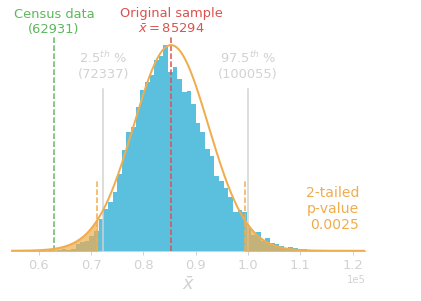

In [76]:
#t distribution
tdist_ucla = stats.t(df=len(ucla_sample)-1, loc=ucla_sample.GROSS.mean(), scale=(ucla_sample.GROSS.std())/np.sqrt(len(ucla_sample)))
xt_ucla = np.linspace(res_ucla_mean.min()-7000, res_ucla_mean.max()+5000, 100000)
yt_ucla = tdist_ucla.pdf(xt_ucla)

fig = plt.figure(figsize=(6,4))
ax1 = fig.add_axes([0.1, 0.15, 0.82, 0.75])
ax2 = ax1.twinx()
ax3 = ax1.twinx()
ax4 = ax1.twinx()
ax5 = ax1.twinx()
ax6 = ax1.twinx()
ax7 = ax1.twinx()
    
for ax in [ax1]:
    ax.hist(res_ucla_mean, bins="auto", color=colors["blue"])
    for spine in ["bottom"]:
        ax.spines[spine].set_linewidth(1)
        ax.spines[spine].set_color(colors["lightgray"])
    for spine in ["top", "right", "left"]:
        ax.spines[spine].set_visible(False)
    ax.set_yticks([])
    ax.tick_params(axis="both", width=1, size=4, color=colors["lightgray"], labelcolor=colors["lightgray"], 
                   labelsize=13, pad=4)
    ax.set_xlabel(r'$\bar{x}$', size=18, color=colors["lightgray"])
    ax.set_xlim(xt_ucla.min(), xt_ucla.max())
    ax.ticklabel_format(style='sci', axis='x', scilimits=(0,5))
    ax.set_ylim(0)
    
for ax in [ax2]:
    ax.set_ylim(ax1.get_ylim())
    ax.axvline(ucla_sample.GROSS.mean(), color=colors["red"], ls="--")
    ax.text(ucla_sample.GROSS.mean(), ax.get_ylim()[1]*1.01, "Original sample\n" r"$\bar{{x}}=$" "{:.0f}".format(ucla_sample.GROSS.mean()), color=colors["red"], size=13, ha="center")
 
for ax in [ax3]:
    ax.axvline(ucla_mean_ci[0], ymax=0.75, color=colors["lightgray"], ls="-")
    ax.axvline(ucla_mean_ci[1], ymax=0.75, color=colors["lightgray"], ls="-")
    ax.text(ucla_mean_ci[0], ax.get_ylim()[1]*0.8, "2.5$^{{th}}$ %\n({:.0f})".format(ucla_mean_ci[0]), color=colors["lightgray"], size=13, ha="center")
    ax.text(ucla_mean_ci[1], ax.get_ylim()[1]*0.8, "97.5$^{{th}}$ %\n({:.0f})".format(ucla_mean_ci[1]), color=colors["lightgray"], size=13, ha="center")

for ax in [ax4]:
    ax.axvline(census2014["mean"], color=colors["green"], ls="--")
    ax.text(census2014["mean"], ax.get_ylim()[1]*1.01, "Census data\n({:.0f})".format(census2014["mean"]), color=colors["green"], size=13, ha="center")

for ax in [ax5]:
    ax.plot(xt_ucla, yt_ucla, color=colors["orange"], lw=2)
    
for ax in [ax2, ax3, ax4, ax5]:
    ax.set_ylim(0)
    ax.axis("off")

for ax in [ax6]:
    ax.set_ylim(ax5.get_ylim())
    ax.axis("off")
    ax.fill_between(xt_ucla[xt_ucla<ucla_sample.GROSS.mean()-1.96*ucla_sample_se], yt_ucla[xt_ucla<ucla_sample.GROSS.mean()-1.96*ucla_sample_se],
                       color=colors["orange"], alpha=0.7)
    ax.fill_between(xt_ucla[xt_ucla>ucla_sample.GROSS.mean()+1.96*ucla_sample_se], yt_ucla[xt_ucla>ucla_sample.GROSS.mean()+1.96*ucla_sample_se],
                        color=colors["orange"], alpha=0.7) 
    ax.axvline(ucla_sample.GROSS.mean()-1.96*ucla_sample_se, ymax=0.33, color=colors["orange"], ls="--")
    ax.axvline(ucla_sample.GROSS.mean()+1.96*ucla_sample_se, ymax=0.33, color=colors["orange"], ls="--")

for ax in [ax7]:
    ax.set_ylim(ax4.get_ylim())
    ax.axis("off")
    ax.text(ax.get_xlim()[1]*0.99, ax.get_ylim()[1]*0.1, "2-tailed\np-value\n{:.4f}".format(stats.t.sf(np.abs(t_ucla), len(ucla_sample)-1)*2),
           ha="right", color=colors["orange"], size=14)

plt.savefig("/Users/Gui/Box Sync/_STATS13/_Slides/_stats13-Lectures/assets/img/lec/salaries-ucla2014-resampling-ttest.svg", transparent=True)

### bootstrap steps

In [73]:
n_simul = 10000
res_ucla_mean = np.zeros(n_simul)
res_ucla_median = np.zeros(n_simul)

for i in range(n_simul):
    res_ucla_mean[i]=np.random.choice(ucla_sample.GROSS.values, size=len(ucla_sample)).mean()
    res_ucla_median[i]=np.median(np.random.choice(ucla_sample.GROSS.values, size=len(ucla_sample)))

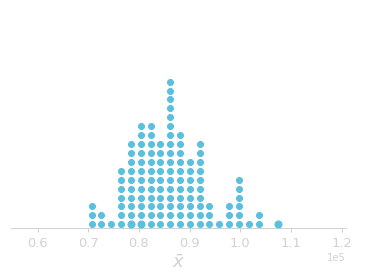

In [74]:
x1, y1 = st.to_dotplot(res_ucla_mean[:120], kind="bins", scale=0.05, nbins=20)

#randomize order of each rows of data points
rows_yval = np.unique(y1)
idx_by_rows = [list(np.where(y1 == val)[0]) for val in rows_yval]
for i in range(len(idx_by_rows)):
    np.random.shuffle(idx_by_rows[i])
shuffled_idx = np.concatenate(idx_by_rows)

x1 = x1[shuffled_idx]
y1 = y1[shuffled_idx]

fig, ax1 = plt.subplots(figsize=(6, 4))
ax2 = ax1.twinx()
ax3 = ax1.twinx()
ax4 = ax1.twinx()
ax5 = ax1.twinx()
ax6 = ax1.twinx()
ax7 = ax1.twinx()
ax8 = ax1.twinx()

for ax in [ax1]:
    for spine in ["bottom"]:
        ax.spines[spine].set_linewidth(1)
        ax.spines[spine].set_color(colors["lightgray"])
    for spine in ["top", "right", "left"]:
        ax.spines[spine].set_visible(False)
    ax.set_yticks([])
    ax.tick_params(axis="both", width=1, size=4, color=colors["lightgray"], labelcolor=colors["lightgray"], 
                   labelsize=13, pad=4)
    ax.set_xlabel(r'$\bar{x}$', size=18, color=colors["lightgray"])
    ax.set_ylim(-0.02, 1.2)
    ax.set_xlim(xt_ucla.min(), xt_ucla.max())
    ax.ticklabel_format(style='sci', axis='x', scilimits=(0,5))

for ax in [ax2, ax3, ax4, ax5, ax6, ax7, ax8]:
    ax.set_ylim(ax1.get_ylim())
    ax.axis("off")
    
for ax in [ax2]:
    ax.scatter(x1[0], y1[0], s=50, color=colors["blue"])

for ax in [ax3]:
    ax.scatter(x1[1], y1[1], s=50, color=colors["blue"])

for ax in [ax4]:
    ax.scatter(x1[2], y1[2], s=50, color=colors["blue"])

for ax in [ax5]:
    ax.scatter(x1[3:25], y1[3:25], color=colors["blue"])

for ax in [ax6]:
    ax.scatter(x1[25:50], y1[25:50], color=colors["blue"])

for ax in [ax7]:
    ax.scatter(x1[50:80], y1[50:80], color=colors["blue"])

for ax in [ax8]:
    ax.scatter(x1[80:], y1[80:], color=colors["blue"])


plt.savefig("/Users/Gui/Box Sync/_STATS13/_Slides/_stats13-Lectures/assets/img/lec/salaries-ucla2014-bootstrap-steps.svg", transparent=True)

In [99]:
true_sampling = np.zeros(n_simul)
for i in range(n_simul):
    sample_idx = np.random.choice(data.index.values, replace=False, size=100)
    sample = data.ix[sample_idx]
    true_sampling[i]=sample.GROSS.mean()

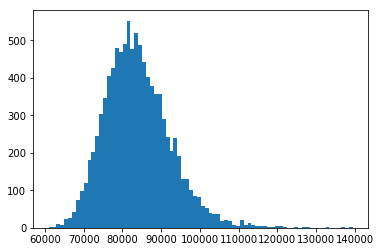

In [155]:
plt.hist(true_sampling, bins="auto");

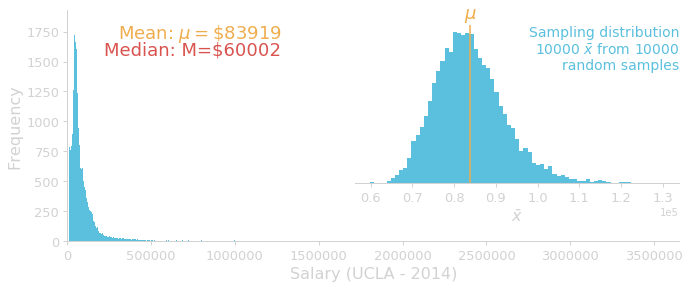

In [116]:
fig = plt.figure(figsize=(10,4))
ax1 = fig.add_axes([0.1, 0.15, 0.85, 0.8])
ax2 = fig.add_axes([0.5, 0.35, 0.45, 0.55])


ax1.hist(data.GROSS, bins="auto", color=colors["blue"]);
ax2.hist(true_sampling, bins="auto", color=colors["blue"]);

for ax in [ax1]:
    for spine in ["bottom", "left"]:
        ax.spines[spine].set_linewidth(1)
        ax.spines[spine].set_color(colors["lightgray"])
    for spine in ["top", "right"]:
        ax.spines[spine].set_visible(False)
    ax.set_xlim(0)
    ax.set_ylim(0)
    ax.set_xlabel("Salary (UCLA - 2014)", size=16, color=colors["lightgray"])
    ax.tick_params(axis="both", width=1, size=4, color=colors["lightgray"], labelcolor=colors["lightgray"], 
                   labelsize=13, pad=4)
    ax.set_ylabel("Frequency", size=16, color=colors["lightgray"])
    ax.text(ax.get_xlim()[1]*0.35, ax.get_ylim()[1]*0.95, "Mean: $\mu=\$${:.0f}".format(data.GROSS.mean()), size=18, color=colors["orange"], ha="right", va="top")
    ax.text(ax.get_xlim()[1]*0.35, ax.get_ylim()[1]*0.87, "Median: M=${:.0f}".format(data.GROSS.median()), size=18, color=colors["red"], ha="right", va="top")
 
for ax in [ax2]:
    for spine in ["bottom"]:
        ax.spines[spine].set_linewidth(1)
        ax.spines[spine].set_color(colors["lightgray"])
    for spine in ["top", "right", "left"]:
        ax.spines[spine].set_visible(False)
    ax.text(ax.get_xlim()[1]*1, ax.get_ylim()[1]*1, "Sampling distribution\n10000 " r"$\bar{x}$" " from 10000\nrandom samples", size=14, color=colors["blue"], ha="right", va="top")
    ax.set_yticks([])
    ax.set_xlabel(r"$\bar{x}$", size=16, color=colors["lightgray"])
    ax.tick_params(axis="x", width=1, size=4, color=colors["lightgray"], labelcolor=colors["lightgray"], 
                   labelsize=13, pad=4)
    ax.ticklabel_format(style='sci', axis='x', scilimits=(0,5))
    ax.axvline(data.GROSS.mean(), color=colors["orange"])
    ax.text(data.GROSS.mean(), ax.get_ylim()[1]*1.04, "$\mu$", size=18, ha="center", color=colors["orange"])

plt.savefig("/Users/Gui/Box Sync/_STATS13/_Slides/_stats13-Lectures/assets/img/lec/salaries-ucla2014-true-sampling-distribution.svg", transparent=True)